In [8]:
from sklearn.datasets import load_digits

digits = load_digits()

In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.data.shape

(1797, 64)

In [12]:
digits.images.shape

(1797, 8, 8)

1


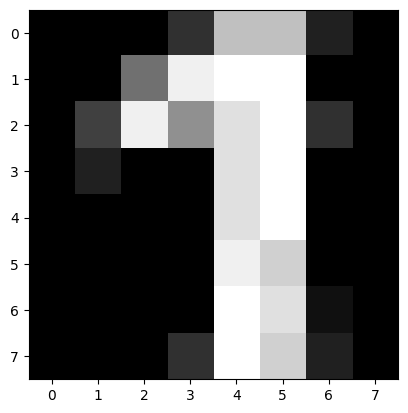

In [18]:
import matplotlib.pyplot as plt

x = digits.images[1500]

print(digits.target[1500])
plt.gray()
plt.imshow(x)
plt.show()

# preprocess

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# performance metric

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    r = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')

    print(f'acc_train = {acc_train * 100} \n acc_test = {acc_test * 100} \n percision = {p * 100} \n recall = {r * 100} \n')
    
    return acc_test, acc_train, p, r

# calssification

## 1.random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=256, max_depth=64)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, n_estimators=256)

In [29]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 97.22222222222221 
 percision = 97.2346848194502 
 recall = 97.22222222222221 



## 2.SVM

In [32]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [33]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 98.51851851851852 
 percision = 98.54105561790747 
 recall = 98.51851851851852 



## 3.ANN

In [37]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='tanh', solver='lbfgs', learning_rate='adaptive')
ann.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=1024,
              learning_rate='adaptive', solver='lbfgs')

In [38]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 95.37037037037037 
 percision = 95.47985929781564 
 recall = 95.37037037037037 



## 4.KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [40]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 98.64757358790771 
 acc_test = 97.96296296296296 
 percision = 97.99424640610137 
 recall = 97.96296296296296 



# Comparison

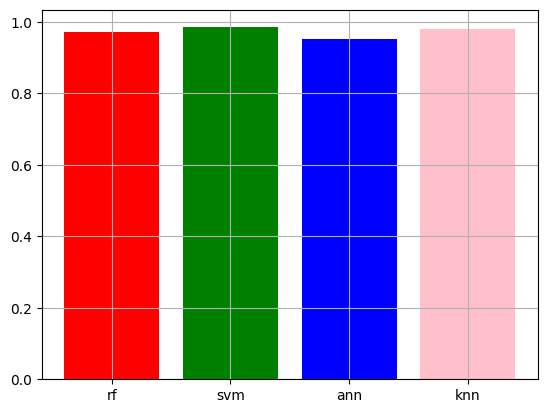

In [41]:
import matplotlib.pyplot as plt
acc_train = [acc_train_rf,acc_train_svm,acc_train_ann,acc_train_knn]
title = ['rf', 'svm', 'ann', 'knn']
colors = ['red', 'green', 'blue', 'pink']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

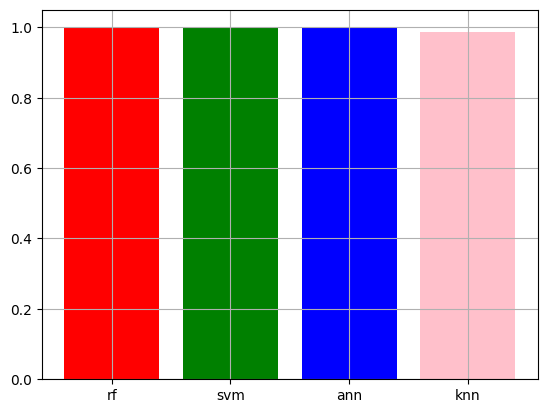

In [45]:
acc_test = [acc_test_rf,acc_test_svm,acc_test_ann,acc_test_knn]
title = ['rf', 'svm', 'ann', 'knn']
colors = ['red', 'green', 'blue', 'pink']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

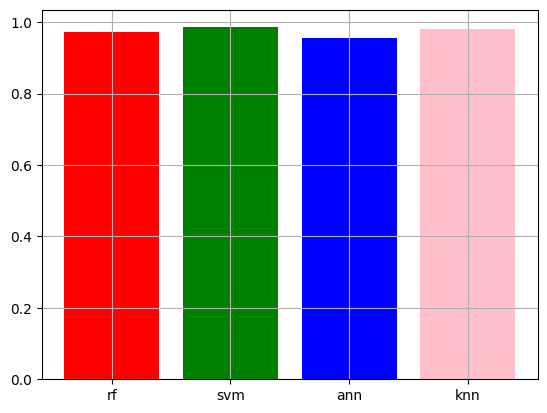

In [46]:
p = [p_rf,p_svm,p_ann,p_knn]
title = ['rf', 'svm', 'ann', 'knn']
colors = ['red', 'green', 'blue', 'pink']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

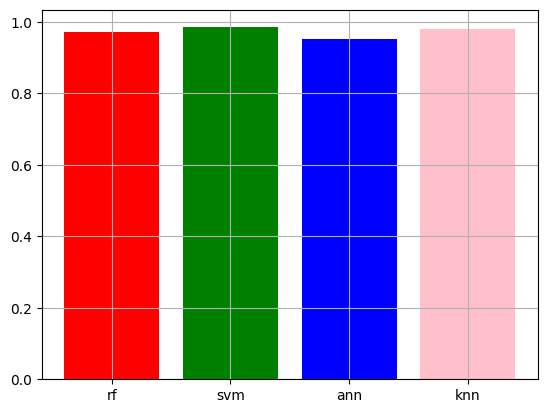

In [44]:
r = [r_rf,r_svm,r_ann,r_knn]
title = ['rf', 'svm', 'ann', 'knn']
colors = ['red', 'green', 'blue', 'pink']

plt.bar(title, r, color=colors)
plt.grid()
plt.show()